### **Week 2**

In [1]:
import numpy as np

In [2]:
!pip install IPython

## **Training** Data

In [3]:
w1 = 3
w0 = 4
n = 100

X = 10 * np.random.rand(n,)

y = w0+w1*X+np.random.rand(n,)

In [4]:
print(X.shape,y.shape)

(100,) (100,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80,) (80,) (20,) (20,)


In [7]:
X_train[:5]

array([1.93671002, 6.69104289, 0.50317535, 0.95620299, 3.579985  ])

In [8]:
y_train[:5]

array([10.59423021, 24.20123996,  5.67004178,  7.04034709, 14.94554041])

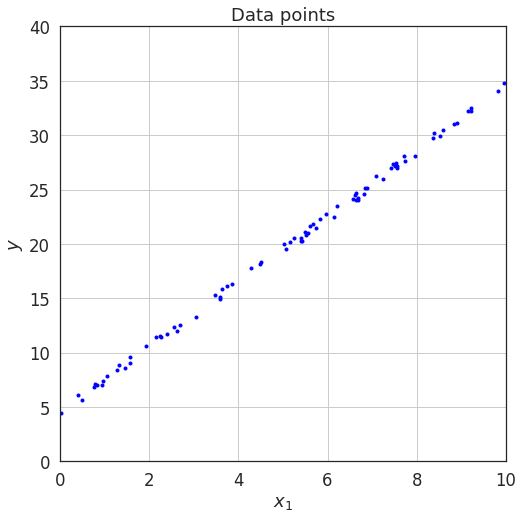

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("white")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

plt.plot(X_train,y_train,"b.")
plt.title("Data points")
plt.grid(True)
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", fontsize = 18)
plt.axis([0,10,0,40])

plt.show()



In [13]:
def add_dummy(x):
  return np.column_stack((np.ones(x.shape[0]),x))  #input - tuple

In [14]:
np.column_stack?

Testing

In [15]:
import unittest

class TestDummy(unittest.TestCase):
  def test_dummy(self):
    train_matrix = np.array([[3,2,5],[9,4,7]])
    train_matrix_with_dummy = add_dummy(train_matrix)

    self.assertEqual(train_matrix_with_dummy.shape,(2,4))

    np.testing.assert_array_equal(train_matrix_with_dummy,np.array([[1,3,2,5],[1,9,4,7]]))

unittest.main(argv=[''], defaultTest = 'TestDummy', verbosity  = 2, exit = False)




test_dummy (__main__.TestDummy) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


In [16]:
add_dummy(np.array([[3,4],[9,7]]))

array([[1., 3., 4.],
       [1., 9., 7.]])

In [17]:
print("Before adding dummy",X_train[:5])
print("After adding dummy")

X_train_with_dummy = add_dummy(X_train)
print(X_train_with_dummy[:5])

Before adding dummy [1.93671002 6.69104289 0.50317535 0.95620299 3.579985  ]
After adding dummy
[[1.         1.93671002]
 [1.         6.69104289]
 [1.         0.50317535]
 [1.         0.95620299]
 [1.         3.579985  ]]


### **Model**

In [18]:
def predict(X,w):

  assert X.shape[-1]==w.shape[0]
  return X@w

In [19]:
import unittest
class TestPredict(unittest.TestCase):

  def test_predict(self):

    train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    expected_label_vector = np.array([11,21])

    predicted_label_vec = predict(train_matrix,weight_vector)

    self.assertEqual(predicted_label_vec.shape, (2,))

    np.testing.assert_array_equal(predicted_label_vec, expected_label_vector)

unittest.main(argv = [''], defaultTest = "TestPredict", verbosity = 2, exit = False)

test_predict (__main__.TestPredict) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [20]:
def generate_data(n):
  w1 = 3
  w0 = 4

  X = 10 * np.random.rand(n,)

  y = w0+w1*X+np.random.rand(n,)

  return X,y

In [21]:


w1 = 3
w0 = 4
n = 100

X = 10 * np.random.rand(n,)

y = w0+w1*X+np.random.rand(n,)

In [22]:
X_dummy = add_dummy(X)

In [23]:
def preprocess(X,y):
  X_dummy = add_dummy(X)
  return  train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

In [25]:
w = np.random.rand(2,)
w

array([0.21388722, 0.84941   ])

In [26]:
y_hat = predict(X_train, w)

In [27]:
y_hat[:10]

array([8.35366398, 7.78790483, 7.7745235 , 1.88042648, 5.58889841,
       4.25978213, 5.74429023, 5.29997705, 3.56555508, 6.78033109])

In [28]:
y[:10]

array([ 7.16740534, 24.7478926 ,  6.80057292, 25.19820625,  9.45181772,
       31.77470207, 13.0757483 , 13.93159298, 16.07498543, 16.73733523])

Non-vectorized

In [29]:
def non_vec(X,w):

  y = []
  for i in range(0,X.shape[0]):
    y_hat_i = 0
    for j in range(0,X.shape[-1]):
      y_hat_i += X[i][j]*w[j]
    y.append(y_hat_i)
  return np.array(y)

In [30]:
import unittest

class TestPredictNonvec(unittest.TestCase):

  def test_predict_nonvec(self):
    train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    expected_label_vector = np.array([11,21])

    predicted_label_vec = non_vec(train_matrix,weight_vector)

    self.assertEqual(predicted_label_vec.shape, (2,))

    np.testing.assert_array_equal(predicted_label_vec, expected_label_vector)

unittest.main(argv = [''], defaultTest = "TestPredict", verbosity = 2, exit = False)


test_predict (__main__.TestPredict) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


Vectorized vs Nonvectorized

In [31]:
import time 

start_time = time.time()
y_hat_vecorized = predict(X_train, w)
end_time = time.time()
print("Vector time: ", end_time - start_time)

start_time = time.time()
y_hat_vecorized = non_vec(X_train, w)
end_time = time.time()
print("Non-Vector time: ", end_time - start_time)

Vector time:  0.00010895729064941406
Non-Vector time:  0.0002734661102294922


In [32]:
X,y = generate_data(n = 1000000)
X_dummy = add_dummy(X)
X_train, X_test, y_train, y_test = train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

start_time = time.time()
y_hat_vecorized = predict(X_train, w)
end_time = time.time()
print("Vector time: ", end_time - start_time)

start_time = time.time()
y_hat_vecorized = non_vec(X_train, w)
end_time = time.time()
print("Non-Vector time: ", end_time - start_time)

Vector time:  0.004649639129638672
Non-Vector time:  2.030418872833252


## **Loss Function**

In [63]:
def loss (X,y,w):
  e = predict(X,w) - y
  # print(e)
  return 0.5*(np.transpose(e)@e)

In [34]:
import unittest

class TestLoss(unittest.TestCase):

  def test_predict_nonvec(self):
    train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    label_vector = np.array([6,11])
    expected_loss = np.array([62.5])

    loss_val = loss(train_matrix, label_vector, weight_vector)
    print(loss_val)

    self.assertEqual(loss_val.shape, ())

    np.testing.assert_array_equal(loss_val, expected_loss)

unittest.main(argv = [''], defaultTest = "TestLoss", verbosity = 2, exit = False)


test_predict_nonvec (__main__.TestLoss) ... 

62.5


ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [35]:
X,y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X,y)
w = np.random.rand(2,)

In [36]:
def visualize_loss_single_feature(X_train, y_train, w):
  sns.set_style("white")
  f = plt.figure(figsize = (8,8))
  sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

  print(X_train.shape, y_train[:5])
  plt.plot(X_train[:,-1],y_train,"b.")
  pred = predict(X_train,w)
  plt.plot(X_train[:,-1], pred ,"b.", color = 'green')
  plt.title("Loss-vis")
  plt.grid(True)
  plt.xlabel("$x_1$", fontsize = 18)
  plt.ylabel("$y$", fontsize = 18)
  plt.axis([0,10,0,40])

  plt.vlines(X_train[:,-1], pred, y_train, colors = 'r', linestyles = 'solid')

  plt.show()


(80, 2) [34.4707481   8.52845263 26.92032236 16.73468137  9.50759726]


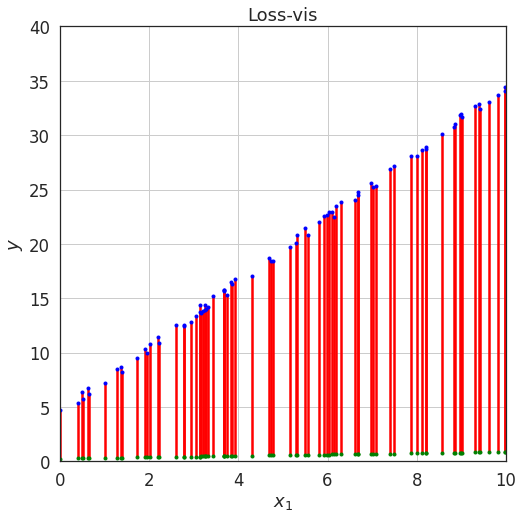

In [37]:
visualize_loss_single_feature(X_train,y_train,w)

(80, 2) [34.4707481   8.52845263 26.92032236 16.73468137  9.50759726]


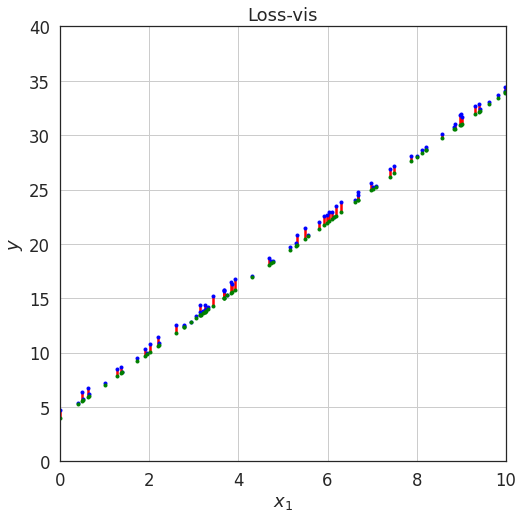

In [38]:
visualize_loss_single_feature(X_train,y_train,np.array([4,3]))

## **Optimization**

In [72]:
X,y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X,y)

Normal equation

In [73]:
def normal_eq(X,y):
  # returns weight vec
  return np.linalg.pinv(X)@y     #pseudoiverse of X

In [74]:
import unittest

class TestNormal(unittest.TestCase):

  def test_predict_nonvec(self):
    train_matrix = X_train
    label_vector = y_train
    expected_weight_vector = np.array([4.,3.])

    estimated_weight_vec = normal_eq(train_matrix, label_vector)
    print(estimated_weight_vec)
    
    self.assertEqual(estimated_weight_vec.shape, (2,))

    np.testing.assert_array_almost_equal(
        estimated_weight_vec, expected_weight_vector, decimal = 0)

unittest.main(argv = [''], defaultTest = "TestNormal", verbosity = 2, exit = False)


test_predict_nonvec (__main__.TestNormal) ... 

[4.56243353 2.98928454]


ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


Gradient Descent

In [75]:
def calc_grad(X,y,w):
  return np.transpose(X)@(predict(X,w)-y)
  


In [76]:
class TestGrad(unittest.TestCase):

  def test_grad(self):
    train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    label_vector = np.array([6,11])
    expected_grad = np.array([15, 105, 50, 95])

    grad = calc_grad(train_matrix, label_vector, weight_vector)
    # print(loss_val)

    self.assertEqual(grad.shape, (4,))

    np.testing.assert_array_equal(grad, expected_grad)

unittest.main(argv = [''], defaultTest = "TestGrad", verbosity = 2, exit = False)


test_grad (__main__.TestGrad) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


Weight Update

In [77]:
def weightupdate(w, grad, lr):
  return (w - lr*grad)

In [78]:
class TestWeight(unittest.TestCase):

  def test_weight(self):
    # train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    # train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    # label_vector = np.array([6,11])
    grad_vec = np.array([15, 105, 50, 95])
    expected_w = np.array([0.985, 0.895, 0.95, 0.905])

    w_new = weightupdate(weight_vector, grad_vec, 0.001)
    # print(loss_val)

    self.assertEqual(w_new.shape, (4,))

    np.testing.assert_array_equal(w_new, expected_w)

unittest.main(argv = [''], defaultTest = "TestWeight", verbosity = 2, exit = False)


test_weight (__main__.TestWeight) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [84]:
def gradient_descent(X:np.ndarray,y:np.ndarray, lr:float, num_epochs:int):
  w_all = []
  err_all = []

  w = np.zeros((X.shape[1]))

  print()

  for i in np.arange(0,num_epochs):
    w_all.append(w)

    err_all.append(loss(X,y,w))

    djdw = calc_grad(X,y,w)

    if i%100 == 0:
      print("Iteration: %d, loss: %4.2f" %(i, err_all[-1]))

    w = weightupdate(w,djdw,lr)

  return w, err_all, w_all



In [85]:
class TestGD(unittest.TestCase):

  def test_gd(self):
    train_matrix = X_train
    label_vector = y_train
    expected_weight_vector = np.array([4.,3.])

    w,err_all, w_all = gradient_descent(train_matrix, label_vector, lr = 0.0001, num_epochs = 2000)
    # print(estimated_weight_vec)
    
    self.assertEqual(w.shape, (2,))

    np.testing.assert_array_almost_equal(
        w, expected_weight_vector, decimal = 0)

unittest.main(argv = [''], defaultTest = "TestGD", verbosity = 2, exit = False)


test_gd (__main__.TestGD) ... 


Iteration: 0, loss: 17375.43
Iteration: 100, loss: 123.25
Iteration: 200, loss: 79.11
Iteration: 300, loss: 51.22
Iteration: 400, loss: 33.60
Iteration: 500, loss: 22.48
Iteration: 600, loss: 15.45
Iteration: 700, loss: 11.01
Iteration: 800, loss: 8.21
Iteration: 900, loss: 6.43
Iteration: 1000, loss: 5.32
Iteration: 1100, loss: 4.61
Iteration: 1200, loss: 4.16
Iteration: 1300, loss: 3.88
Iteration: 1400, loss: 3.70
Iteration: 1500, loss: 3.59
Iteration: 1600, loss: 3.52
Iteration: 1700, loss: 3.47
Iteration: 1800, loss: 3.45
Iteration: 1900, loss: 3.43


ok

----------------------------------------------------------------------
Ran 1 test in 0.045s

OK


In [87]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr = 0.00001, num_epochs = 200)


Iteration: 0, loss: 17375.43
Iteration: 100, loss: 272.91


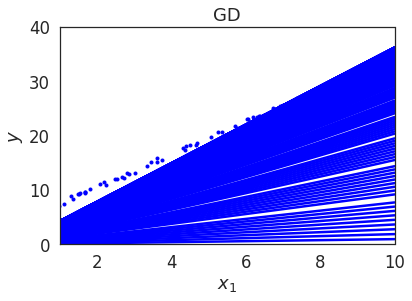

In [98]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]   #add_dummy
X_new = np.array([[0], [10]])
X_new_b = np.c_[np.ones((2,1)), X_new]     #add_dummy

for j in range(0, len(w_all)):
  if j%10==0: continue
  y_hat = predict(X_new_b, w_all[j])
  style = 'b-' if j>0 else "r--"
  plt.plot(X_new_b[:,1], y_hat, style)

plt.plot(X_train[:,1], y_train, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", fontsize = 18)
plt.title("GD", fontsize = 18)
plt.axis([1,10,0,40])
plt.show()

In [95]:
 X_new_b

array([[ 1.,  0.],
       [ 1., 10.]])